In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Preprocess Images

In [254]:
def applyThreshold(img, threshold = 0):
    return img * (img> threshold)

def loadImagesFromFolder(folder, threshold = 0):
    images = []
    file_names = []
    for file_name in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,file_name))
        if img is not None:
            images.append(applyThreshold(img, threshold=threshold))
            file_names.append(file_name)
    return np.array(images), np.array(file_names)



def showImg(img, file_name = "asd", figure_size = (5,5)):
    fig = plt.figure(figsize=figure_size)
    plt.imshow(img, cmap='gray')
    plt.title(file_name)
    
def getEdgeImg(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edge = canny(gray_img/255.).astype(np.uint8)
    return edge
def getDialateImg(img):
    edge = getEdgeImg(img)
    kernel = np.ones((3,3), np.uint8)
    dilation = cv2.dilate(edge,kernel,iterations = 1)
    return dilation
def drawCircle(img, file_name = "asd", figure_size = (5,5)):
    img = getDialateImg(img)
    contours, hierarchy= cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    fig = plt.figure(figsize = figure_size)
    ax = fig.add_subplot()
    ax.imshow(img, cmap = 'gray')

    for i in contours:
        M = cv2.moments(i)
        if M['m00'] != 0:
            cx = int(M['m10']/M['m00'])
            cy = int(M['m01']/M['m00'])
            circle = plt.Circle((cx, cy), 20, color='y', alpha=0.3)
            ax.add_artist(circle)
    ax.set_title(file_name)
def countObj(img):
    contours, hierarchy= cv2.findContours(getDialateImg(img), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    return len(contours)

In [263]:
folder_path = "../images/suez/"
images, file_names = loadImagesFromFolder(folder_path, threshold= 0)

date = np.array([file_name[:-4] for file_name in file_names])

38


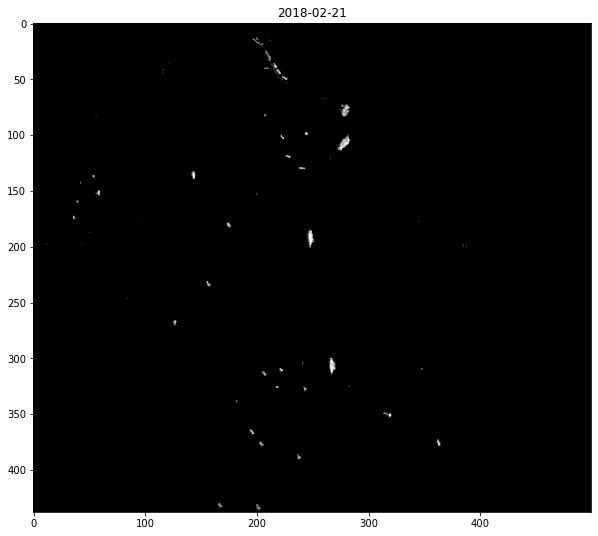

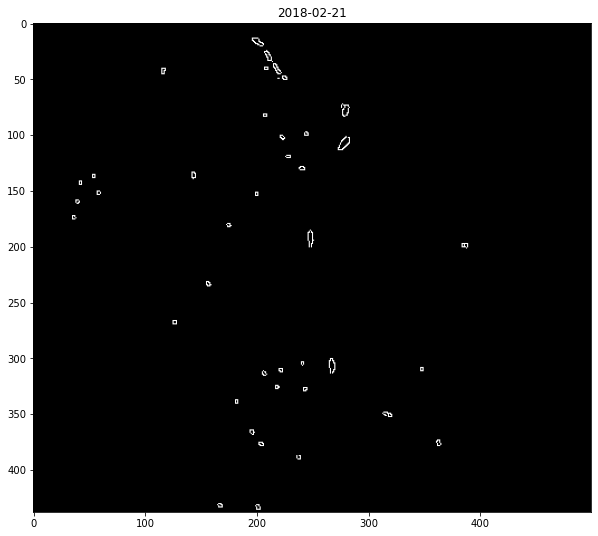

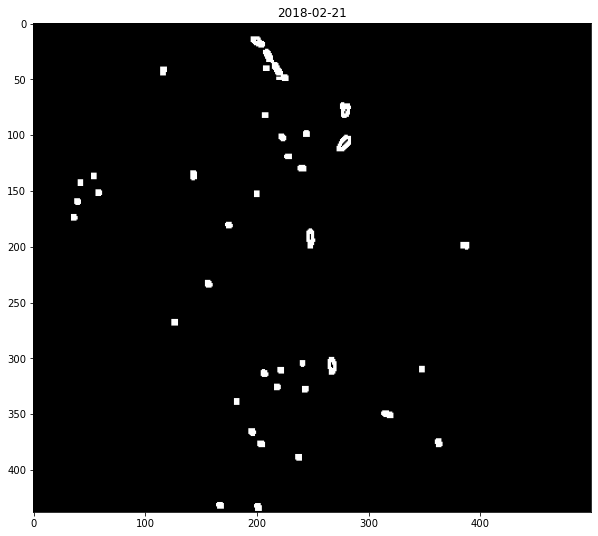

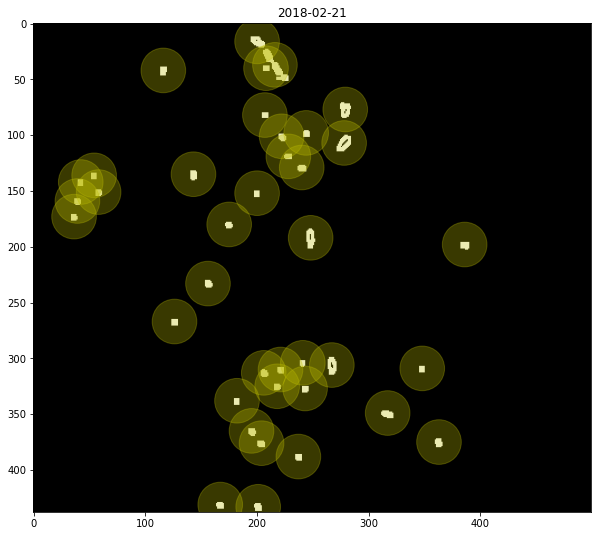

In [344]:
img_index = 8
# img_index = 90 # noisy day
img = images[img_index]

#show original image
showImg(img, date[img_index], figure_size = (10, 10))

#edge detection
showImg(getEdgeImg(img), date[img_index], figure_size = (10, 10))

# #dialate image
showImg(getDialateImg(img), date[img_index], figure_size = (10, 10))

#count number of ship
drawCircle(img, date[img_index], figure_size = (10, 10))
print(countObj(img))

In [283]:
from celluloid import Camera
from tqdm import tqdm
def createGif(folder_path, gif_path):
    images, file_names = loadImagesFromFolder(folder_path, threshold= 0)
    date = np.array([file_name[:-4] for file_name in file_names])
    
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot()
    
    camera = Camera(fig)
    for i in tqdm(range(len(images))):
        ax.imshow(images[i], cmap='gray')
        # ax.set_title(date[i])
        ax.text(0.1, 0.9, date[i], color='white', ha='center', va='center', fontsize=20, transform=ax.transAxes)
        camera.snap()
        
        
    animation = camera.animate()
    animation.save(gif_path, writer='Pillow', dpi=100, fps=1)

        

100%|██████████| 241/241 [00:00<00:00, 405.81it/s]
MovieWriter Pillow unavailable; using Pillow instead.


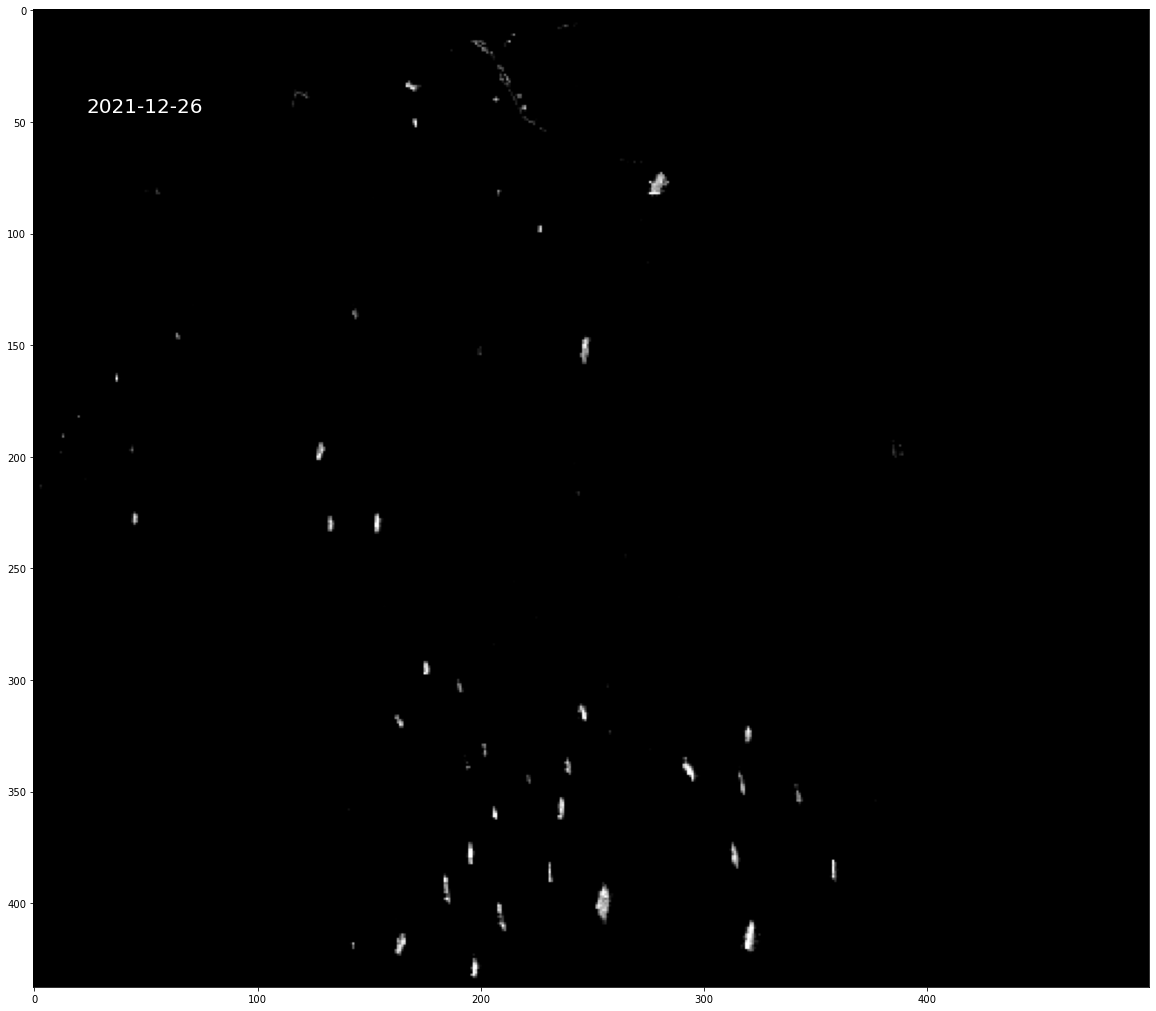

In [284]:
# Create Gif

# folder_path = "../images/suez/"
# gif_path = "../gif/suez.gif"
# createGif(folder_path, gif_path)

100%|██████████| 222/222 [00:00<00:00, 266.90it/s]
MovieWriter Pillow unavailable; using Pillow instead.


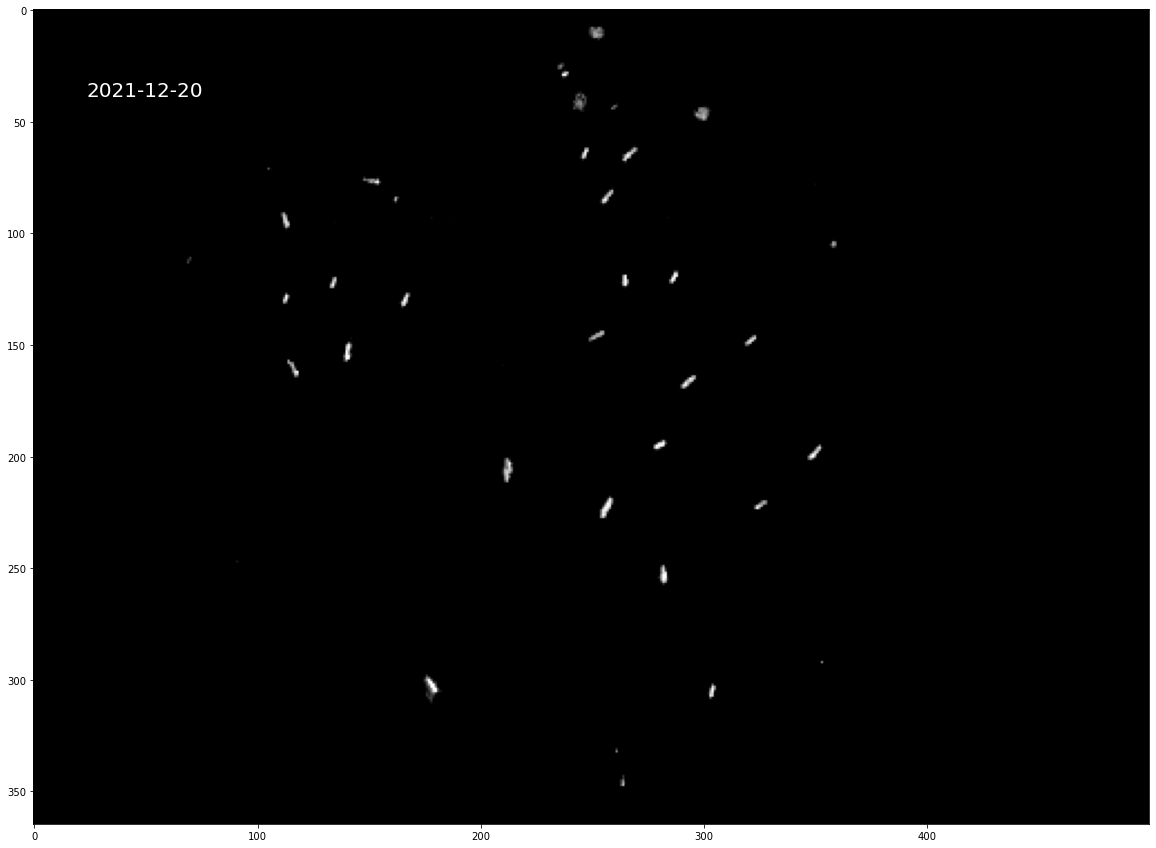

In [285]:
# folder_path = "../images/longbeach/"
# gif_path = "../gif/longbeach.gif"
# createGif(folder_path, gif_path)

# Turning Images Into Tabular data

In [337]:
min_threshold = 20
max_threshold = 80

folder_path = "../images/suez/"
images_min_threshold, file_names = loadImagesFromFolder(folder_path, threshold= min_threshold)
n_obj_min_threshold = np.array([countObj(img) for img in images_min_threshold])

date = np.array([file_name[:-4] for file_name in file_names])
folder_path = "../images/suez/"
images_max_threshold, file_names = loadImagesFromFolder(folder_path, threshold= max_threshold)
n_obj_max_threshold = np.array([countObj(img) for img in images_max_threshold])

In [338]:
# Use pandas to make plot prettier
import pandas as pd

df =pd.DataFrame({"time":date, "n_obj_min_threshold":n_obj_min_threshold, "n_obj_max_threshold":n_obj_max_threshold})
df["time"] = pd.to_datetime(df["time"])

Text(0.5, 1.0, 'n ships every 6 days')

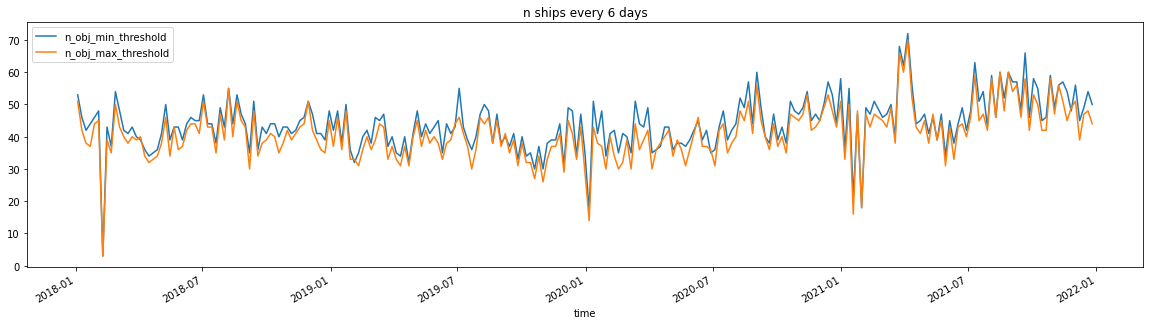

In [339]:
fig = plt.figure(figsize=(20, 5))
ax = fig.subplots()

df.plot(x = "time", y="n_obj_min_threshold", figsize = (20, 5), ax = ax)
df.plot(x = "time", y="n_obj_max_threshold", figsize = (20, 5), ax = ax)
ax.set_title("n ships every 6 days")

In [340]:
n_obj_avg = (n_obj_min_threshold + n_obj_max_threshold)/2
n_obj_err = np.maximum( np.abs(n_obj_avg - n_obj_min_threshold), np.abs(n_obj_avg - n_obj_max_threshold))
df["y"] = n_obj_avg
df["y_err"] = n_obj_err


In [341]:
# Use pandas to make plot prettier
import pandas as pd

df =pd.DataFrame({"time":date, "y":n_obj_avg, "y_err":n_obj_err})
df["time"] = pd.to_datetime(df["time"])

Text(0.5, 1.0, 'n ships every 6 days')

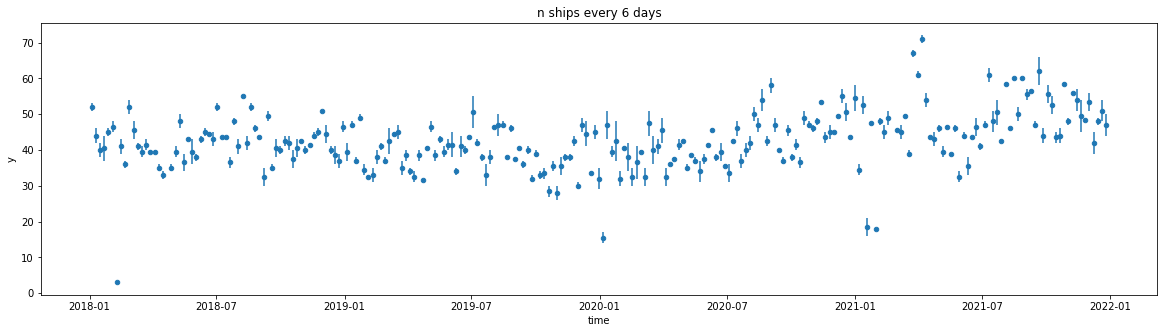

In [342]:
fig = plt.figure(figsize=(20, 5))
ax = fig.subplots()

df.plot(kind = "scatter", x = "time", y="y", yerr= "y_err", figsize = (20, 5), ax = ax)
ax.set_title("n ships every 6 days")

Text(0.5, 1.0, 'n ships every 6 days')

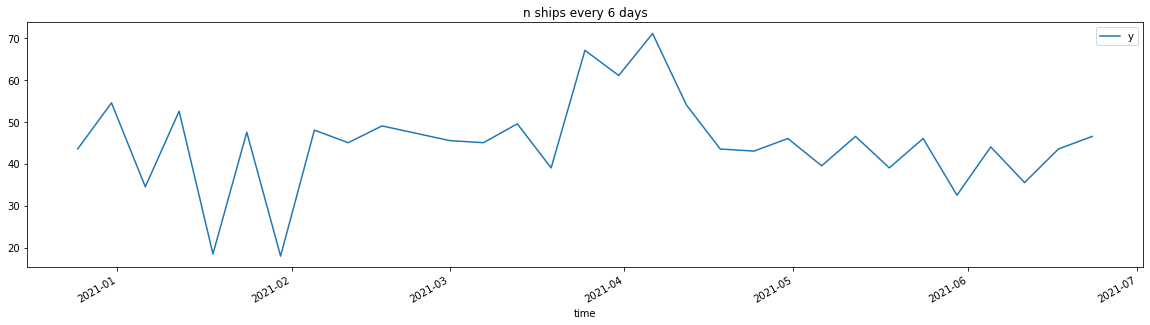

In [347]:
fig = plt.figure(figsize=(20, 5))
ax = fig.subplots()
df[180:210].plot(x = "time", y="y", figsize = (20, 5), ax = ax)
# df[150:250].plot(x = "time", y="y", figsize = (20, 5), ax = ax)
ax.set_title("n ships every 6 days")

# Testing part, dont mind these

<ErrorbarContainer object of 3 artists>

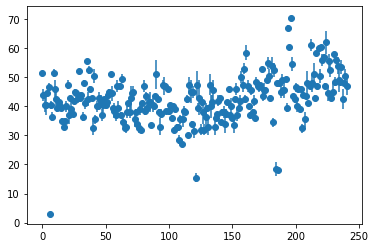

In [300]:
plt.errorbar(range(len(n_obj_avg)), n_obj_avg, yerr=n_obj_err, fmt='o')

In [195]:
n_obj = np.array(n_obj)
n_obj_threshold = np.array(n_obj_threshold)
np.sum(n_obj == n_obj_threshold)

27

In [183]:
np.sum(n_obj - n_obj_threshold)

TypeError: unsupported operand type(s) for -: 'list' and 'list'

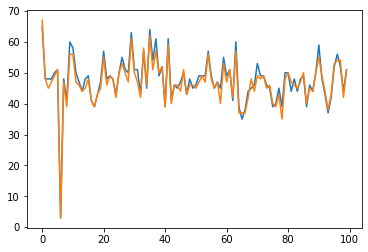

In [177]:
plt.plot(n_obj[:100])
plt.plot(n_obj_threshold[:100])

In [178]:
print(np.sum(n_obj == n_obj_threshold))

0


In [153]:
folder_path = "../images/suez/"
images, file_names = loadImagesFromFolder(folder_path, threshold= 0)

#convert to grayscale iamge
# images = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images])

In [125]:
# edge detection with Canny
from skimage.feature import canny
edges = np.array([canny(img/255.) for img in images]).astype(np.uint8)

In [144]:
n_obj = np.array([countObj(img) for img in images])

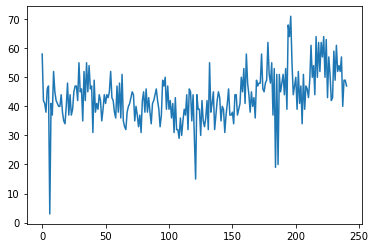

In [145]:
plt.plot(n_obj)

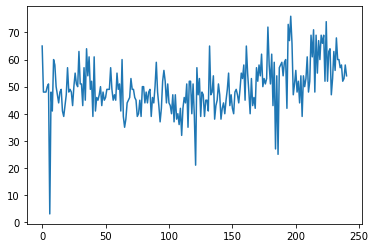

In [147]:
folder_path = "../images/suez/"
images, file_names = loadImagesFromFolder(folder_path, threshold= 0)
n_obj = np.array([countObj(img) for img in images])
plt.plot(n_obj)

#convert to grayscale iamge
# images = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images])

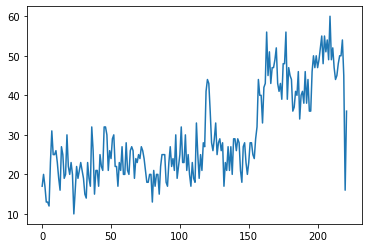

In [148]:
folder_path = "../images/longBeach/"
images, file_names = loadImagesFromFolder(folder_path, threshold= 0)
n_obj = np.array([countObj(img) for img in images])
plt.plot(n_obj)

#convert to grayscale iamge
# images = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images])

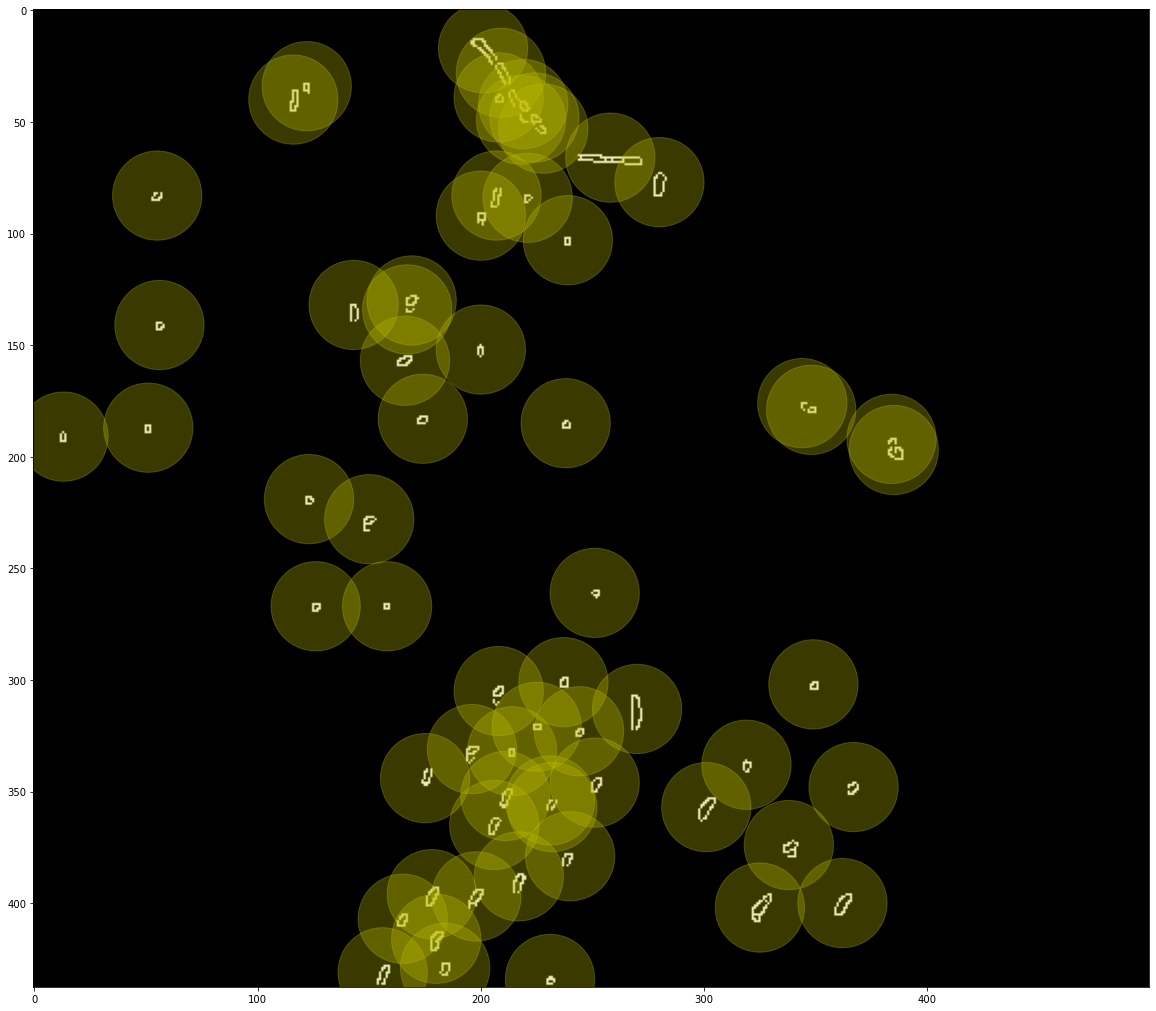

In [132]:
drawCircle(dilation[0])

In [58]:
circle = plt.Circle((x1, y1), agent_radius, color='y', alpha=0.3)

            ax_simulation.add_artist(circle)

232

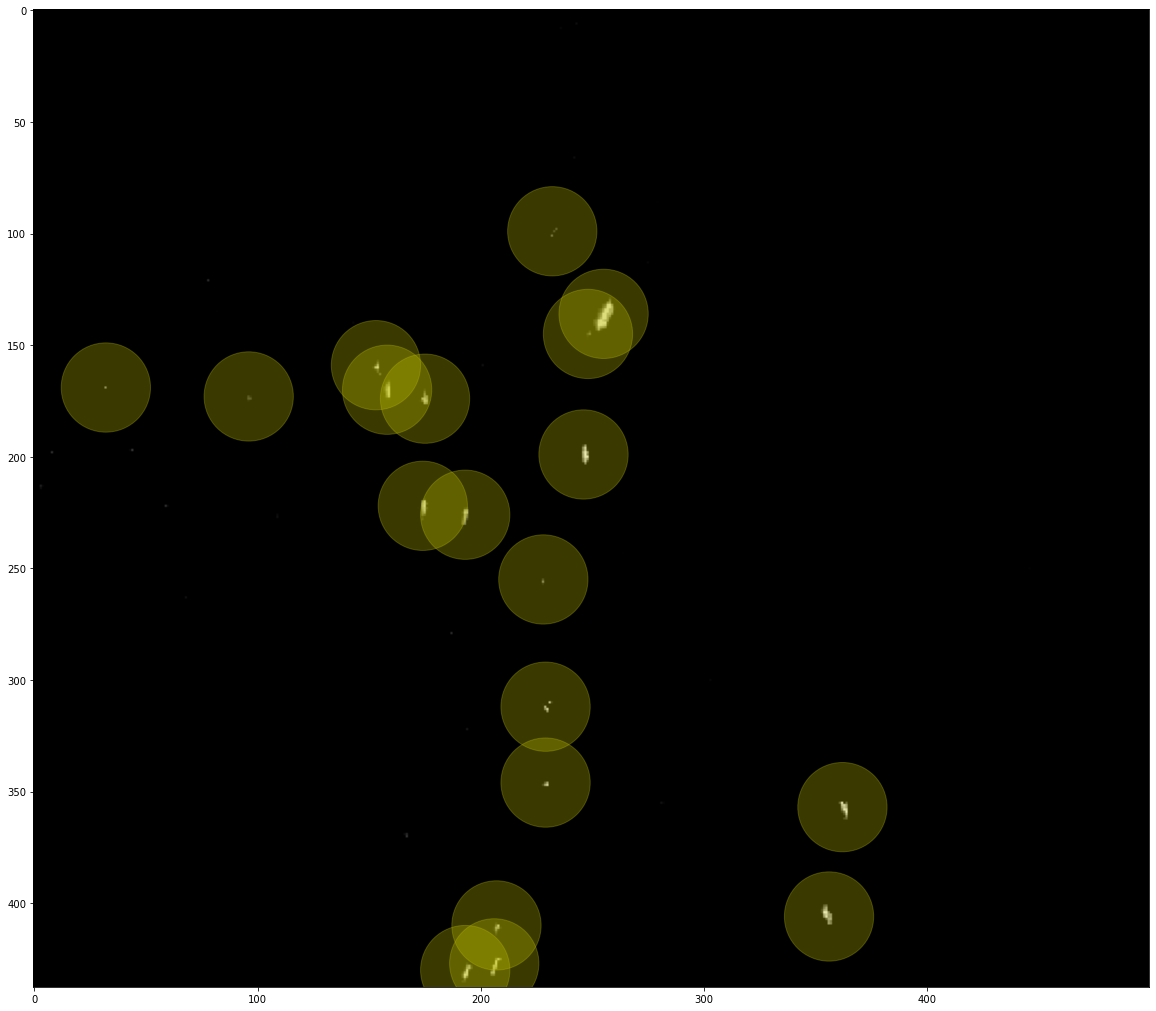

In [68]:
# kernel = np.ones((5,5),np.uint8)

image = images[1].copy()
edge = canny(image/255.).astype(np.uint8)
kernel = np.ones((1,1), np.uint8)
dilation = cv2.dilate(edge,kernel,iterations = 1)
contours, hierarchy= cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

fig = plt.figure(figsize = (20, 20))
ax = fig.add_subplot()
ax.imshow(image, cmap = 'gray')

for i in contours:
    M = cv2.moments(i)
    if M['m00'] != 0:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        circle = plt.Circle((cx, cy), 20, color='y', alpha=0.3)
        ax.add_artist(circle)



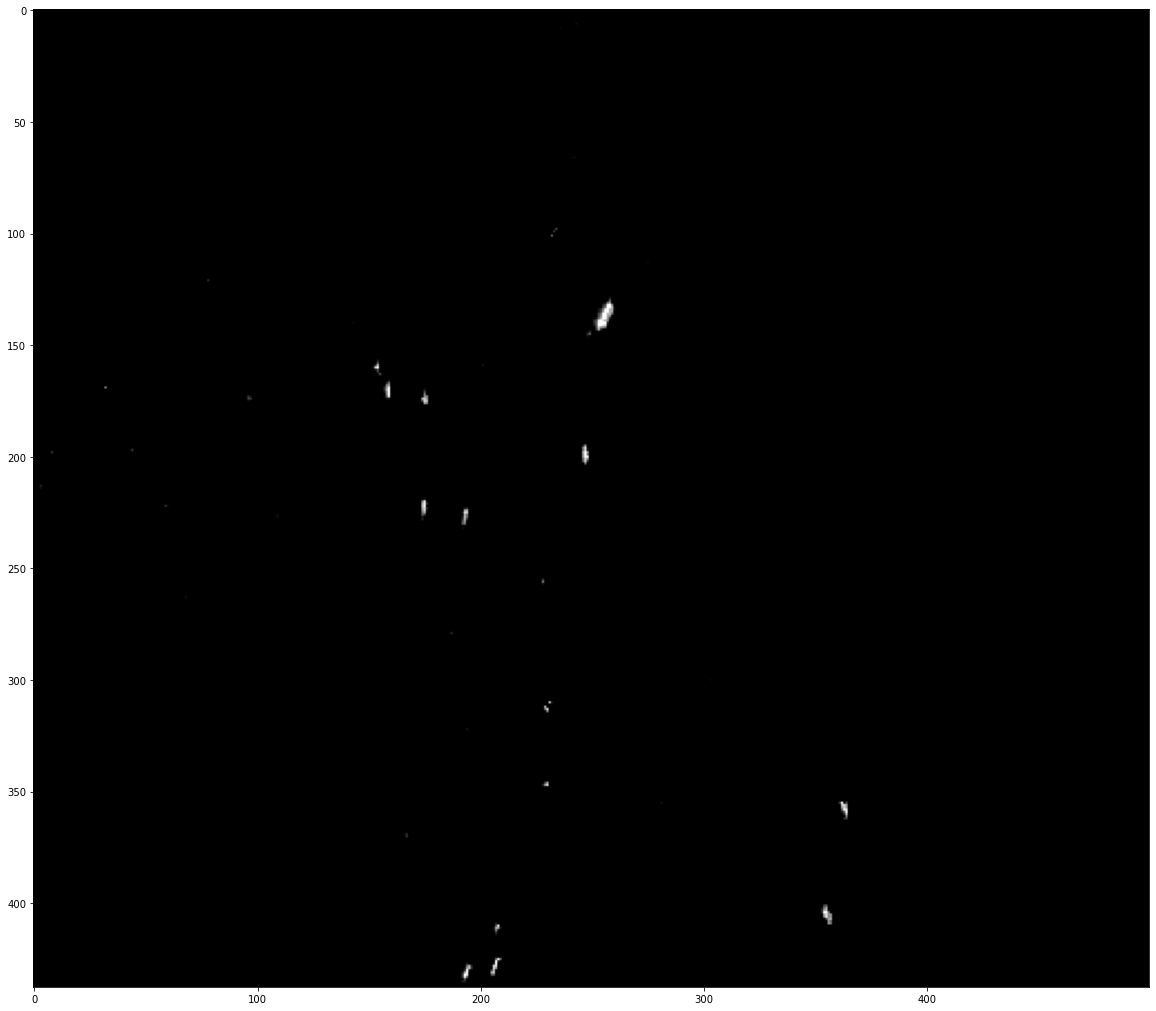

In [71]:
image = images[1].copy()
fig = plt.figure(figsize = (20, 20))
ax = fig.add_subplot()
ax.imshow(image, cmap = 'gray')

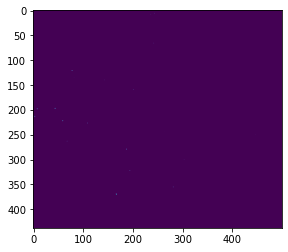

In [55]:
# kernel = np.ones((5,5),np.uint8)

image = images[1].copy()
edge = canny(image/255.).astype(np.uint8)
kernel = np.ones((1,1), np.uint8)
dilation = cv2.dilate(edge,kernel,iterations = 1)
contours, hierarchy= cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)



for i in contours:
    M = cv2.moments(i)
    if M['m00'] != 0:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        cv2.drawContours(image, [i], -1, (0, 255, 0), 2)
        cv2.circle(image, (cx, cy), 20, (0, 0, 255), -1)
        cv2.putText(image, "center", (cx - 20, cy - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

plt.imshow(image)

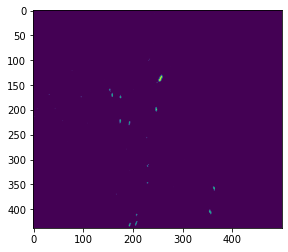

In [54]:
plt.imshow(images[1])

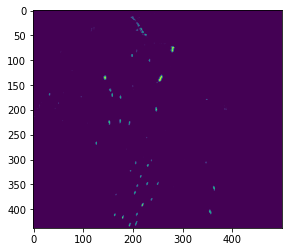

In [48]:
plt.imshow(images[1])

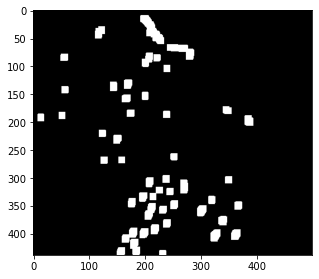

In [38]:
show_img(dilation)

In [28]:
contours, hierarchy= cv2.findContours(edges[0].copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

47